# CASO DE ESTUDIO 1 - RED NEURONAL PREDICCION DE PRECIOS DE VIVIENDAS

## 1. Carga de dataset y subida a DataFrame

In [382]:
import pandas as pd

!pip install kagglehub
import kagglehub



[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Descarga directa de kaggle

In [383]:

# # Download latest version
# path_kaggle = kagglehub.dataset_download("yasserh/housing-prices-dataset", path="Housing.csv", force_download=True)

# print("Path to dataset files:", path_kaggle)



### Descarga de local

In [384]:
path_local = "house-dtset.csv"

### Carga en dataset

In [385]:
# df = pd.read_csv(path_kaggle)
df = pd.read_csv(path_local)

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


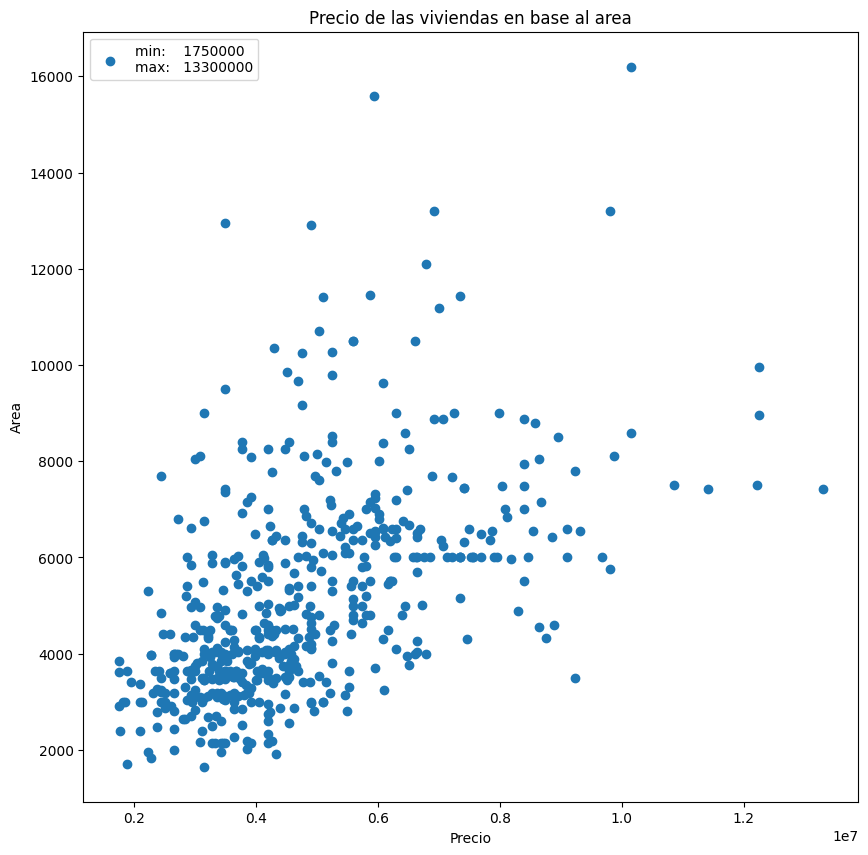

In [386]:
import matplotlib.pyplot as plt

min_price = df["price"].min()
max_price = df["price"].max()
legend_text = f"min:    {min_price}\nmax:   {max_price}"

plt.figure(figsize=(10,10))
plt.scatter(df["price"], df["area"])
plt.xlabel("Precio")
plt.ylabel("Area")
plt.legend([legend_text], loc="upper left")

plt.title("Precio de las viviendas en base al area")
plt.show()

### Visualizacion Nulos

In [387]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

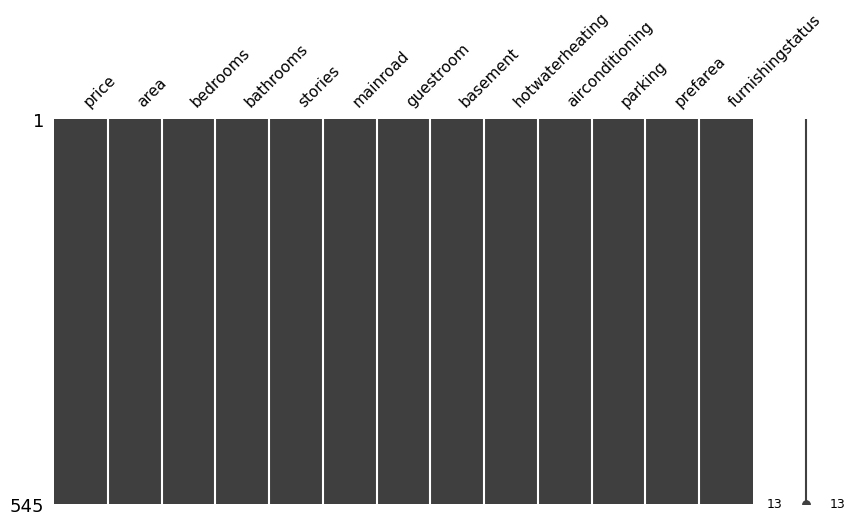

In [388]:
!pip install missingno
import missingno as msno

# Plot a matrix chart, set chart and font size
msno.matrix(df, figsize=(10,5), fontsize=11)

## 2. Preprocesamiento de datos

### Codificacion de variables categoricas

In [389]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [390]:
columnas_a_cambiar = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]

for col in columnas_a_cambiar:
    print(df[col].unique())


['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['yes' 'no']
['yes' 'no']
['furnished' 'semi-furnished' 'unfurnished']


> Podemos ver que todas las variables que tenemos que cambiar a valores numerico son binarias (yes, no) excepto *furnishingstatus* que tiene tres valores

#### Variables binarias

In [391]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# Aplicar Label Encoding a las columnas binarias
binary_columns = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
for col in binary_columns:
    df[col] = encoder.fit_transform(df[col])  # Convierte "yes" -> 1 y "no" -> 0

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


#### Variables complejas
Usaremos OrdinalEncoder de scikit para transformar la columna de *furnishingstatus*.

In [392]:
from sklearn.preprocessing import OrdinalEncoder

# Crear el codificador
encoder = OrdinalEncoder(categories=[["unfurnished", "semi-furnished", "furnished"]])

# Aplicar Ordinal Encoding
df["furnishingstatus"] = encoder.fit_transform(df[["furnishingstatus"]])

print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2.0


### Feature Engineering

In [393]:
df["bedrooms_per_story"] = df["bedrooms"] / df["stories"]
df["bathrooms_per_story"] = df["bathrooms"] / df["stories"]

df["total_rooms"] = df["bedrooms"] + df["bathrooms"]

# df["stories_per_area"] = df["stories"] / df["area"]
# df["parking_per_area"] = df["parking"] / df["area"]

# df["stories_area_interaction"] = df["stories"] * df["area"]

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,bedrooms_per_story,bathrooms_per_story,total_rooms
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2.0,1.333333,0.666667,6
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2.0,1.000000,1.000000,8
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1.0,1.500000,1.000000,5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2.0,2.000000,1.000000,6
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2.0,2.000000,0.500000,5


### Normalizacion

In [394]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

categorical_columns = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea", "furnishingstatus"]
numerical_columns = ["area", "bedrooms","bathrooms","stories","parking","bedrooms_per_story","bathrooms_per_story","total_rooms"]

# Ajustar y transformar los datos numéricos
df[categorical_columns] = std_scaler.fit_transform(df[categorical_columns])
df[numerical_columns] = minmax_scaler.fit_transform(df[numerical_columns])

df = pd.DataFrame(df, columns=df.columns)

print(type(df))
df.head()

<class 'pandas.core.frame.DataFrame'>


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,bedrooms_per_story,bathrooms_per_story,total_rooms
0,13300000,0.396564,0.6,0.333333,0.666667,0.405623,-0.465315,-0.734539,-0.219265,1.472618,0.666667,1.804941,1.406286,0.185185,0.151515,0.666667
1,12250000,0.502405,0.6,1.000000,1.000000,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.000000,-0.554035,1.406286,0.111111,0.272727,1.000000
2,12250000,0.571134,0.4,0.333333,0.333333,0.405623,-0.465315,1.361397,-0.219265,-0.679063,0.666667,1.804941,0.091662,0.222222,0.272727,0.500000
3,12215000,0.402062,0.6,0.333333,0.333333,0.405623,-0.465315,1.361397,-0.219265,1.472618,1.000000,1.804941,1.406286,0.333333,0.272727,0.666667
4,11410000,0.396564,0.6,0.000000,0.333333,0.405623,2.149083,1.361397,-0.219265,1.472618,0.666667,-0.554035,1.406286,0.333333,0.090909,0.500000


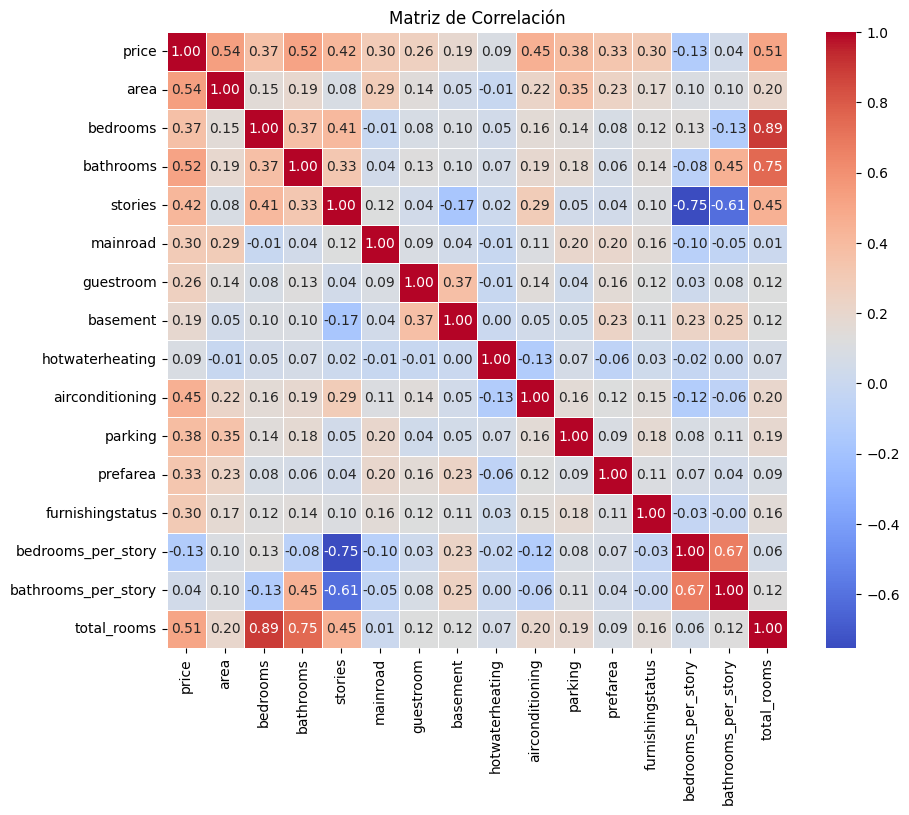

In [395]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = df.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el mapa de calor con seaborn
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Agregar título
plt.title("Matriz de Correlación")

# Mostrar el grafico
plt.show()

### Separacion features y target

In [396]:
# Escalar la variable price si los resultados no son buenos, sino mejor no escalarla

# df_target = df[["price"]] # Para que se quede como dataframe se pone entre [[]], sino al ser solo 1 columna si es solo [] se convierte a Series
# df_feats = df.drop(columns=["price"])
x = df.drop(columns=["price"])
y = df[["price"]] # Para que se quede como dataframe se pone entre [[]], sino al ser solo 1 columna si es solo [] se convierte a Series

# print(df_target.columns)
# print(df_feats.columns)
print(x.columns)
print(y.columns)
print(type(df))

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'furnishingstatus', 'bedrooms_per_story', 'bathrooms_per_story',
       'total_rooms'],
      dtype='object')
Index(['price'], dtype='object')
<class 'pandas.core.frame.DataFrame'>


In [397]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.5, random_state=0)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(272, 15)
(272, 1)
(273, 15)
(273, 1)


## 3. Model Planning

###  3.1 Arquitectura y definición
- **Tipo de Modelo:** Regresión con red neuronal.
- **Entrada:** Numero de columnas deseadas (sin incluir precio). 
- **Capas Ocultas** Dos capas densas con activación ReLU
- **Salida:** Predicción del precio. 1 neurona con activación lineal

### 3.2 Función de perdida y optimizador
- **Loss Function** Error cuadratico medio (MSE)
- **Optimizadores a comparar** Adam y SGD con momentum

### 3.3 Evaluación del Modelo
- **Metricas**: MAE, RMSE, R<sup>2</sup>
- **Validación cruzada**: K-Fold con $k=5$

## 4. Model Building

In [398]:
import tensorflow as tf


def create_model(dropout_value=0.25, learning_rate=0.001):
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(shape=(x.shape[1],)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(dropout_value),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1, activation='linear')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
        loss=tf.keras.losses.mse,
        metrics=[tf.keras.metrics.MeanAbsoluteError(),
                tf.keras.metrics.RootMeanSquaredError(),
                tf.keras.metrics.R2Score()
        ]
    )
    return model

model_price = create_model(dropout_value=0.25, learning_rate=0.001)

model_price.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 128)            │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,369 (40.50 KB)

 Trainable params: 10,369 (40.50 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenamiento del modelo

In [399]:
def train_model(model, nepochs=100, batch_size=32):
    history = model.fit(
        x_train,
        y_train,
        epochs=nepochs,
        batch_size=batch_size,
        validation_split=0.2,
        verbose=1
    )

train_model(model=model_price, nepochs=200, batch_size=32)


Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 25564475817984.0000 - mean_absolute_error: 4718663.5000 - r2_score: -6.8201 - root_mean_squared_error: 5054302.0000 - val_loss: 25385154641920.0000 - val_mean_absolute_error: 4730790.5000 - val_r2_score: -7.4483 - val_root_mean_squared_error: 5038368.5000
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 27172479696896.0000 - mean_absolute_error: 4843130.0000 - r2_score: -6.3409 - root_mean_squared_error: 5212266.0000 - val_loss: 25385150447616.0000 - val_mean_absolute_error: 4730789.0000 - val_r2_score: -7.4483 - val_root_mean_squared_error: 5038368.0000
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 27795669385216.0000 - mean_absolute_error: 4949384.0000 - r2_score: -7.8426 - root_mean_squared_error: 5270708.0000 - val_loss: 25385139961856.0000 - val_mean_absolute_error: 4730788.5000 - val_r2_score: -7.4483 - val_root_mean_squared_error: 5038367.0000
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 

In [400]:
# model_price.summary()
results = model_price.evaluate(x_test, y_test, verbose=1)

metric_names = ['Loss', 'MSE', 'RMSE', 'R2']

for name, result in zip(metric_names, results):
    if name == "R2":
        # R2 Score ya es un valor entre -1 y 1, lo convertimos en porcentaje
        print(f"{name}: {result * 100:.2f}%")
    else:
        # Para otras métricas (como error absoluto y RMSE), multiplicamos por 100 para mostrar en porcentaje
        print(f"{name}: {result * 100:.2f}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23018162094080.0000 - mean_absolute_error: 4490173.0000 - r2_score: -6.4866 - root_mean_squared_error: 4796711.0000 
Loss: 2346192365158400.00
MSE: 449847300.00
RMSE: 484375100.00
R2: -553.92%


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


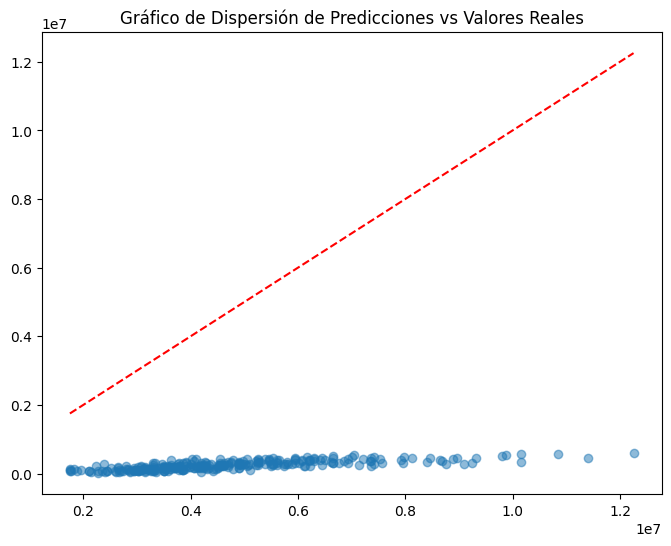

In [401]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener predicciones
y_pred = model_price.predict(x_test).flatten()  # Asegurar que es un array 1D

# Gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--")
plt.title("Gráfico de Dispersión de Predicciones vs Valores Reales")
plt.show()